# **MENTAL STRESS DETECTION**

#### **IMPORTING LIBRARIES AND LOADING DATASET**

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df=pd.read_csv("D:\\mental stress\\stress.csv")

#### **DATA PREPARATION**

In [111]:
df.head(5)

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [112]:
df.describe()

,label,confidence,social_timestamp
count,2838.000000,2838.000000,2.838000e+03
mean,0.524313,0.808972,1.518107e+09
std,0.499497,0.177038,1.552209e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.509698e+09
50%,1.000000,0.800000,1.517066e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542592e+09


In [113]:
df.shape

(2838, 7)

In [114]:
df.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [115]:
df.dtypes

subreddit            object
post_id              object
sentence_range       object
text                 object
label                 int64
confidence          float64
social_timestamp      int64
dtype: object

In [116]:
not_used_col=['subreddit','post_id','sentence_range','confidence','social_timestamp']
df1=df.drop(not_used_col,axis=1)

In [117]:
df1.head(5)

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


In [118]:
df1.label.unique()

array([1, 0], dtype=int64)

#### **TEXT PROCESSING**

In [119]:
import nltk
import re
from urllib.parse import urlparse
from spacy import load
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [120]:
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aaa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aaa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     C:\Users\aaa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:
lemmatizer=WordNetLemmatizer()
stop_words=list(stopwords.words('english'))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**REGULAR EXPRESSIONS FOR CLEANING THE TEXT DATA**

In [122]:
def textProcess(sent):
    try:
        sent=re.sub('[][)(]',' ',sent)
        
        sent=[word for word in sent.split() if not urlparse(word).scheme]
        sent=' '.join(sent)

        sent=re.sub(r'\@\w+','',sent)

        sent=re.sub(re.compile("<.*?>"),'',sent)

        sent=re.sub("[^A-Za-z0-9]",' ',sent)

        sent=sent.lower()

        sent=[word.strip() for word in sent.split()]
        sent=' '.join(sent)

        tokens=word_tokenize(sent)

        for word in tokens:
            if word in stop_words:
                tokens.remove(word)
        
        sent=[lemmatizer.lemmatize(word) for word in tokens]
        sent=' '.join(sent)
        return sent
    
    except Exception as ex:
        print(sent,"\n")
        print("Error ",ex)

In [123]:
df1['processed_text']=df1['text'].apply(lambda text: textProcess(text))
df1.sample(3)

,text,label,processed_text
1973,She was really worried about being retraumatiz...,0,really worried being retraumatized birth time ...
1055,"When I dare to open up to my friends, they tel...",0,dare open friend tell oh brother used fight me...
2708,"I can't afford to buy new clothing, not even f...",0,can afford buy new clothing even goodwill righ...


In [124]:
print("without process ----> ",df1['text'].iloc[23],end='\n\n')
print("after process ----> ",df1['processed_text'].iloc[23])

without process ---->  With a switch blade and open arms In a sweater vest that covers a ragged undershirt stained with my innocence Through faces that are never the same as the ones I dread finding in the crowd In the night, I rediscover my love of mares and how hoarse I can be in the morning It's the taste of blood but I am not bleeding

after process ---->  switch blade open arm a sweater vest cover a ragged undershirt stained innocence face are never same one dread finding crowd the night rediscover my love mare how hoarse can in the morning s the taste blood i not bleeding


#### **VECTORIZATION**

**BAG OF WORD/ COUNT VECTORIZER**

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
MIN_DF=1

In [126]:
cv=CountVectorizer(min_df=MIN_DF)
cv_df=cv.fit_transform(df1['processed_text'])
cv_df.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [127]:
cv_df=pd.DataFrame(cv_df.toarray(),columns=cv.get_feature_names_out())
cv_df.head(3)

,00,000,00am,00pm,02,06,10,100,1000,100kg,...,zines,zinsser,zip,zofran,zoloft,zombie,zone,zoo,zuko,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**TF-IDF(TERM FREQUENCY-INVERSE DOCUMENT FREQUENCY)**

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [129]:
tf=TfidfVectorizer(min_df=MIN_DF)
tf_df=tf.fit_transform(df1['processed_text'])
tf_df.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [130]:
tf_df=pd.DataFrame(tf_df.toarray(), columns=tf.get_feature_names_out())
tf_df.head(3)

,00,000,00am,00pm,02,06,10,100,1000,100kg,...,zines,zinsser,zip,zofran,zoloft,zombie,zone,zoo,zuko,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
tf_df.describe()

,00,000,00am,00pm,02,06,10,100,1000,100kg,...,zines,zinsser,zip,zofran,zoloft,zombie,zone,zoo,zuko,zumba
count,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,0.000452,0.000548,0.000123,0.000159,0.000109,0.000069,0.003358,0.001783,0.000576,0.000106,...,0.000078,0.000072,0.000204,0.000078,0.000715,0.000126,0.000245,0.000089,0.000054,0.000040
std,0.011158,0.009998,0.006576,0.006636,0.005801,0.003671,0.021354,0.017204,0.011156,0.005624,...,0.004145,0.003845,0.007786,0.004157,0.011797,0.004733,0.006851,0.004754,0.002873,0.002105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.348402,0.327600,0.350306,0.333106,0.309059,0.195542,0.258662,0.267281,0.310333,0.299611,...,0.220793,0.204838,0.336077,0.221471,0.306537,0.183335,0.268149,0.253283,0.153067,0.112136


In [132]:
cv_df.shape,tf_df.shape

((2838, 10271), (2838, 10271))

#### **MODEL BUILDING**

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

**WITH BOW(Logistic Regression, MultonomialNB, RandomForestClassifier)**

In [134]:
X_train,X_test,Y_train,Y_test=train_test_split(cv_df,df1['label'],stratify=df1['label'])
X_train.shape,Y_test.shape

((2128, 10271), (710,))

In [135]:
model_nb = MultinomialNB().fit(X_train,Y_train)
model_nb.score(X_train,Y_train),model_nb.score(X_test,Y_test)

(0.9257518796992481, 0.7408450704225352)

In [136]:
model_rf = RandomForestClassifier().fit(X_train,Y_train)
model_rf.score(X_train,Y_train),model_rf.score(X_test,Y_test)

(0.9985902255639098, 0.7112676056338029)

**WITH TF-IDF(Logistic Regression, MultonomialNB, RandomForestClassifier)**

In [137]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(tf_df,df1['label'],stratify=df1['label'])
X_train1.shape,Y_test1.shape

((2128, 10271), (710,))

In [138]:
model_lr = LogisticRegression().fit(X_train1,Y_train1)
model_lr.score(X_train1,Y_train1),model_lr.score(X_test,Y_test)

(0.9097744360902256, 0.6591549295774648)

In [139]:
model_nb = MultinomialNB().fit(X_train1,Y_train1)
model_nb.score(X_train1,Y_train1),model_nb.score(X_test1,Y_test1)

(0.8388157894736842, 0.6788732394366197)

In [140]:
model_rf = RandomForestClassifier().fit(X_train1,Y_train1)
model_rf.score(X_train1,Y_train1),model_rf.score(X_test1,Y_test1)

(1.0, 0.7211267605633803)

#### **VALIDATION**

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [142]:
y_pred = model_lr.predict(X_test1)
cm = confusion_matrix(y_pred,Y_test1)
cm

array([[230,  72],
       [108, 300]], dtype=int64)

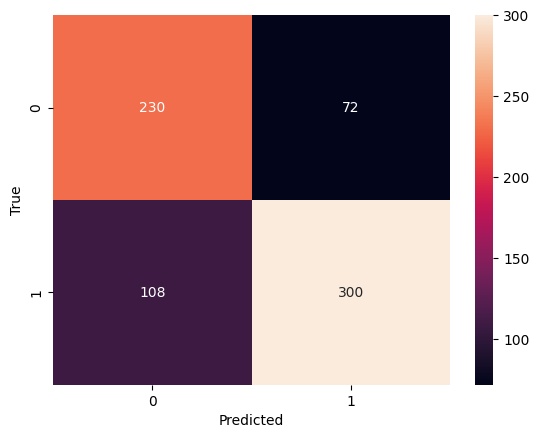

In [143]:
sns.heatmap(cm,annot=True,fmt='')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [144]:
print(classification_report(y_pred,Y_test1))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72       302
           1       0.81      0.74      0.77       408

    accuracy                           0.75       710
   macro avg       0.74      0.75      0.74       710
weighted avg       0.75      0.75      0.75       710



#### **GENERATING PREDICTIONS**

In [145]:
model = LogisticRegression().fit(tf_df,df1['label'])
model.score(tf_df,df1['label'])

0.8999295278365046

In [146]:
def predictor(text):
    processed = textProcess(text)
    embedded_words = tf.transform([text])
    res = model.predict(embedded_words)
    if res[0] == 1:
        res = "this person is in stress"
    else: 
        res = "this person is not in stress"
    return res

In [147]:
text1 = """This is the worst thing that happened to me today. I got less marks in my exam, 
            so it is not going to help me in my future."""
text2 = """Hi sir, I gained a lot of knowledge from you for my future use. 
            This was a very fun journey for me. Thanks for boosting my confidence."""

text3 = """
User: Hi, I need help!

Chatbot: Of course, what can I assist you with?

User: I have a deadline tomorrow and I haven't even started on my project yet. I'm freaking out!

Chatbot: Okay, take a deep breath. Let's start by breaking down the project into smaller tasks. 
What do you need to do first?

User: I need to gather some research and data, but I don't even know where to start!

Chatbot: No problem. Let's begin by outlining the main points of your project, 

and then we can find the resources you need to complete each section. Can you tell me more about your project?

User: It's a marketing report for my boss. I need to analyze our competitors and come up with a new marketing strategy.

Chatbot: Great, that gives us a good starting point. 

Let's look for industry reports and market research that can give you insights into your competitors. 

And don't forget to take breaks and pace yourself as you work on each section. You got this!"""

In [148]:
print(predictor(text1))
print(predictor(text2))
print(predictor(text3))

this person is in stress
this person is not in stress
this person is in stress


In [149]:
import joblib
joblib.dump(model,"Stress Detection Model")

['Stress Detection Model']